## Progreso de los precios: ¿las propiedades en el AMBA están encareciendo?

In [4]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')

In [6]:
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265651 entries, 0 to 265650
Data columns (total 28 columns):
country_name                  131146 non-null object
created_on                    265651 non-null object
currency                      218437 non-null object
description                   131138 non-null object
expenses                      16642 non-null object
floor                         36746 non-null float64
geonames_id                   222108 non-null float64
id                            131146 non-null object
image_thumbnail               256993 non-null object
lat                           212985 non-null float64
lat-lon                       212985 non-null object
lon                           212983 non-null float64
operation                     265651 non-null object
place_name                    265629 non-null object
place_with_parent_names       265651 non-null object
price                         225558 non-null float64
price_aprox_local_currency    225558 n

In [7]:
pev.tail(20)

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
265631,NaN,2013-11-30,USD,NaN,NaN,NaN,3429617.0,NaN,NaN,-34.645045,...,NaN,1979.166667,http://www.properati.com.ar/bdlj_venta_departa...,apartment,1.0,NaN,NaN,48.0,NaN,NaN
265632,NaN,2013-11-30,NaN,NaN,NaN,NaN,3838574.0,NaN,NaN,-32.969365,...,NaN,NaN,http://www.properati.com.ar/bdll_venta_departa...,apartment,NaN,NaN,NaN,NaN,NaN,NaN
265633,NaN,2013-11-30,NaN,NaN,NaN,NaN,3838574.0,NaN,NaN,-32.969365,...,NaN,NaN,http://www.properati.com.ar/bdln_venta_departa...,apartment,NaN,NaN,NaN,NaN,NaN,NaN
265634,NaN,2013-11-30,ARS,NaN,NaN,NaN,NaN,NaN,NaN,-34.452403,...,NaN,2177.151429,http://www.properati.com.ar/bdlq_venta_departa...,apartment,1.0,NaN,NaN,35.0,NaN,NaN
265635,NaN,2013-11-30,USD,NaN,NaN,NaN,3430544.0,NaN,NaN,-34.654846,...,NaN,1724.137931,http://www.properati.com.ar/bdlr_venta_departa...,apartment,1.0,NaN,NaN,29.0,NaN,NaN
265636,NaN,2013-11-30,ARS,NaN,NaN,NaN,3433359.0,NaN,NaN,-34.640895,...,NaN,232.834250,http://www.properati.com.ar/bdls_venta_casa_it...,house,2.0,NaN,NaN,80.0,NaN,NaN
265637,NaN,2013-11-30,USD,NaN,NaN,NaN,NaN,NaN,NaN,-36.785892,...,NaN,NaN,http://www.properati.com.ar/bdlu_venta_casa_ma...,house,NaN,NaN,NaN,NaN,NaN,NaN
265638,NaN,2013-11-30,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/tCT6pJwX3sm-...,-34.546298,...,NaN,NaN,http://www.properati.com.ar/bdlv_venta_departa...,apartment,NaN,NaN,NaN,NaN,NaN,NaN
265639,NaN,2013-11-30,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/X-pIR36PSjmF...,-34.543055,...,NaN,NaN,http://www.properati.com.ar/bdlw_venta_departa...,apartment,NaN,NaN,NaN,NaN,NaN,NaN
265640,NaN,2013-11-30,ARS,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/0nKDJGPq0rzR...,-34.537694,...,NaN,2370.676000,http://www.properati.com.ar/bdlx_venta_departa...,apartment,NaN,NaN,NaN,30.0,NaN,NaN


In [8]:
# En primer lugar: reduzco el set de datos a registros de capital federal + GBA
print(len(pev))
print(len(pev))
#pev_red = pev.loc[(pev.state_name.str.contains('G.B.A')) | (pev.state_name.str.contains('Capital Federal')),\
#    ['state_name', 'price', 'price_aprox_local_currency', 'price_aprox_usd', 'price_per_m2',\
#     'price_usd_per_m2', 'created_on', 'surface']]
pev_red = pev.loc[(pev.state_name.str.contains('G.B.A')) | (pev.state_name.str.contains('Capital Federal')),\
                  ['state_name', 'created_on', 'price_usd_per_m2', 'place_name']]
print(len(pev_red))
pev_red.dropna(inplace=True)
print(len(pev_red))
pev_red.head(2000)

265651
265651
91122
55917


,state_name,created_on,price_usd_per_m2,place_name
12,Bs.As. G.B.A. Zona Sur,2016-07-01,2368.421053,Lomas de Zamora
13,Bs.As. G.B.A. Zona Sur,2016-07-01,1301.587302,Banfield
15,Bs.As. G.B.A. Zona Oeste,2016-07-01,659.090909,San Justo
16,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo
17,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo
18,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo
19,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo
20,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo
21,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo
22,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo


In [9]:
import calendar
pev_red['Date'] = pd.to_datetime(pev_red['created_on'])
pev_red['Año'] = pev_red['Date'].map(lambda x:x.year)


In [10]:
# creo la columna precio promedio
#def funcion_precio_promedio(x):
#    if x['price_per_m2'] != 'Nan': return x['price_per_m2']
    
grouped = pev_red.loc[pev_red.state_name.str.contains('Capital Federal'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])
grouped.head(20)

,mean,size
Año,,
2015,2089.848784,2464.0
2016,2503.359958,16963.0
2017,2416.374719,2225.0


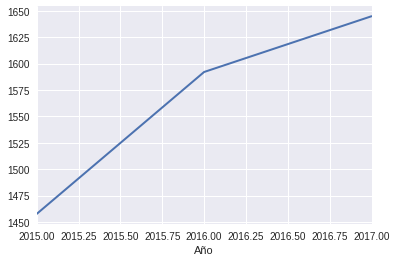

In [26]:
## Evolución por año en Capital Federal
grouped2 = pev_red.loc[pev_red.state_name.str.contains('Norte'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])
grouped2['mean'].plot(linewidth=2.0)

In [12]:
grouped3 = pev_red.loc[pev_red.state_name.str.contains('Oeste'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])
grouped3.head(20)

,mean,size
Año,,
2015,1262.515621,1658.0
2016,1239.862647,6283.0
2017,964.508872,725.0


In [13]:
grouped4 = pev_red.loc[pev_red.state_name.str.contains('Sur'),\
                    ['Año', 'price_usd_per_m2']].groupby('Año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])
grouped4.head(20)

,mean,size
Año,,
2015,1090.113369,409.0
2016,1351.093092,3136.0
2017,1324.397117,435.0


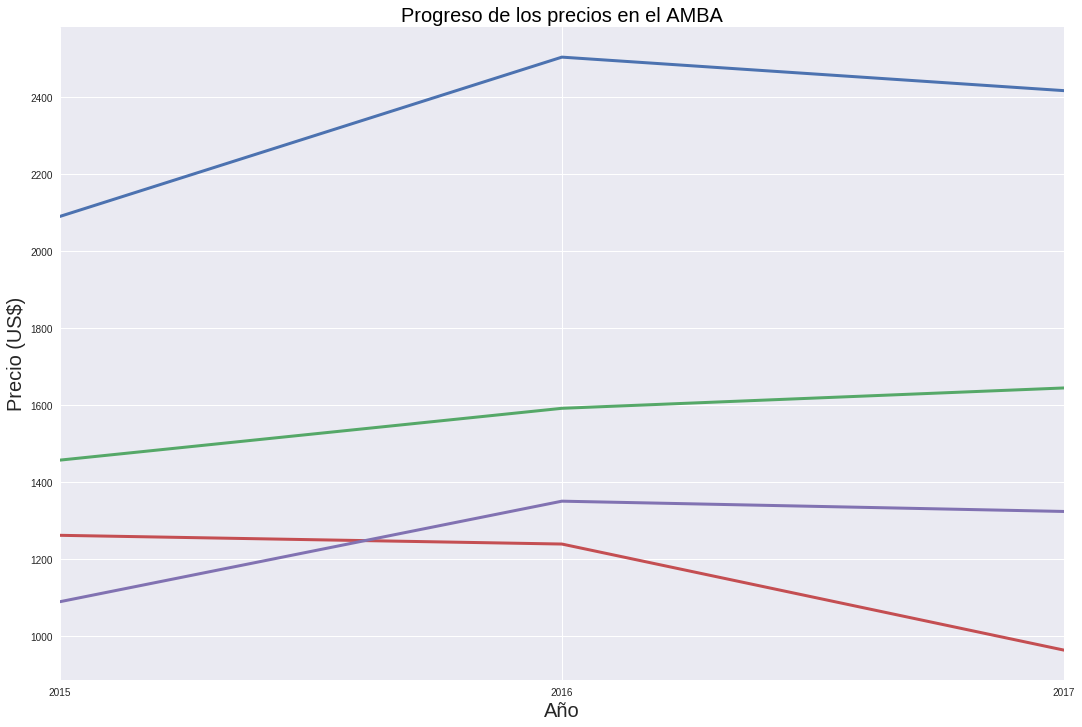

In [41]:
#A este gráfico hay que
#!) agregarle referencias a los colores
#2) hacer que arranque el eje y desde el 0

f= plt.figure()
plt.title('Progreso de los precios en el AMBA',size=20.0, color='black')
ax1 = grouped['mean'].plot(kind='line', linewidth=3, xticks=range(2015,2018), figsize=(18,12), ax=f.gca())
ax1.set_ylabel('Precio (US$)', size=20.0);
ax1.set_xlabel('Year', size=20.0);
ax2 = grouped2['mean'].plot(kind='line', linewidth=3, xticks=range(2015,2018), figsize=(18,12), ax=f.gca())
ax3 = grouped3['mean'].plot(kind='line', linewidth=3, xticks=range(2015,2018), figsize=(18,12), ax=f.gca())
ax4 = grouped4['mean'].plot(kind='line', linewidth=3, xticks=range(2015,2018), figsize=(18,12), ax=f.gca())
plt.show()
